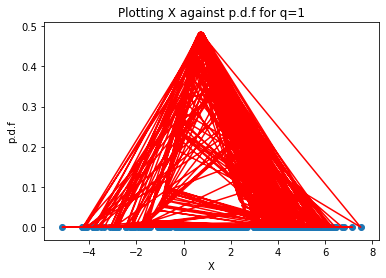

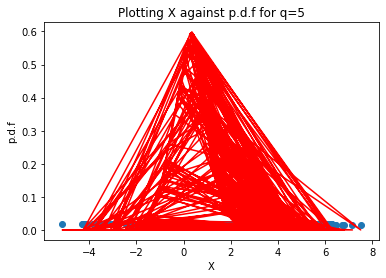

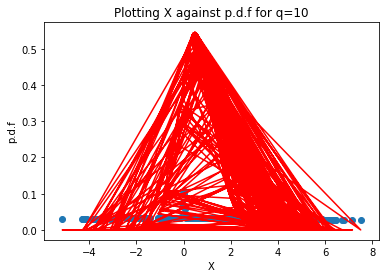

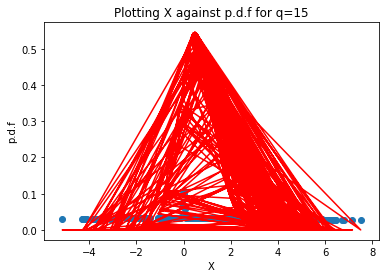

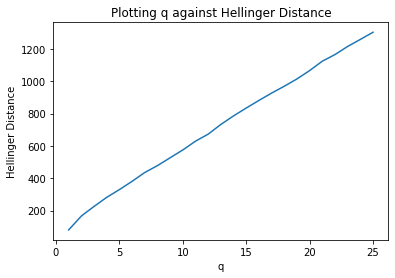

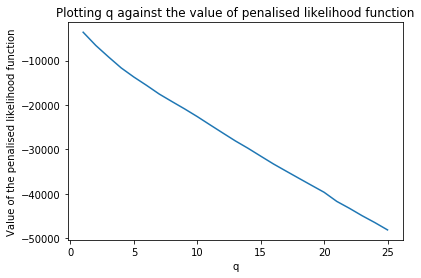

In [1]:
%matplotlib inline
import numpy as np
import csv
import os
import math
import matplotlib.pyplot as plt
os.chdir('/Users/sreelakshmirajendrakumar/Downloads')

flag=0
X=[]
temp=0
with open('project1_em_Q2_X.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        try:
            X.append((float(row[1])))
        except:
            row==0        
    
        
'''alpha=[]
m=[]
sigma=[]
with open('project1_em_Q2_param.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for param in readCSV:
        try:
            alpha.append(float(param[1]))
            m.append(float(param[2]))
            sigma.append(float(param[3]))
        except:
            param==0'''
sigma=[]
alpha=[]
m=[]            
N=len(X)
for q in range(0,25):
    sigmas=np.random.rand(1,q+1)
    sigma.append(sigmas[0])
    ms=np.random.rand(1,q+1)
    m.append(ms[0])
    alphass = np.arange(1,q+2)
    alphas=np.random.dirichlet(alphass)
    alpha.append(alphas)
    
sigmatrue=[]
alphatrue=[]
mtrue=[] 
   
for q in range(0,25):
    alphatrue.append([])
    sigmatrue.append([])
    mtrue.append([])
    for z in range (0,q+1):
        alphatrue[q].append(alpha[q][z])
        sigmatrue[q].append(sigma[q][z])
        mtrue[q].append(m[q][z])

pi_jointtrue=[]
temptrue=0        
for q in range(0,25):
    pi_jointtrue.append([])
    for x in range (0,N):
        pi_jointtrue[q].append([])
        for z in range (0,q+1):
            temptrue=((alphatrue[q][z]*math.exp((-(X[x]-mtrue[q][z])**2)/(2*sigmatrue[q][z])))/(math.sqrt(2*np.pi*sigmatrue[q][z])))
            pi_jointtrue[q][x].append(temptrue)
            
sum_jointtrue=[]
temp1true=0
for q in range(0,25):
    sum_jointtrue.append([])
    for x in range(0,N):
        for z in range(0,q+1):
            temp1true+=pi_jointtrue[q][x][z]
        sum_jointtrue[q].append(temp1true)
        temp1true=0

w=0

while True:
    pi_joint=[]
    for q in range(0,25):
        pi_joint.append([])
        for x in range (0,N):
            pi_joint[q].append([])
            for z in range (0,q+1):
                temp=((alpha[q][z]*math.exp((-(X[x]-m[q][z])**2)/(2*sigma[q][z])))/(math.sqrt(2*np.pi*sigma[q][z])))
                pi_joint[q][x].append(temp)
           
    alpha1=[]
    sigma1=[]
    m1=[]
    for q in range(0,25):
        alpha1.append([])
        sigma1.append([])
        m1.append([])
        for z in range (0,q+1):
            alpha1[q].append(alpha[q][z])
            sigma1[q].append(sigma[q][z])
            m1[q].append(m[q][z])
        
    sum_joint=[]
    temp1=0
    for q in range(0,25):
        sum_joint.append([])
        for x in range(0,N):
            for z in range(0,q+1):
                temp1+=pi_joint[q][x][z]
            sum_joint[q].append(temp1)
            temp1=0
        
    temp2=0       
    pi_conditional=[]
    for q in range(0,25):
        pi_conditional.append([])
        for x in range(0,N):
            pi_conditional[q].append([])
            for z in range(0,q+1):
                temp2=(pi_joint[q][x][z])/sum_joint[q][x]
                pi_conditional[q][x].append(temp2)
    
    sum_conditional=[]
    temp3=0
    for q in range(0,25):
        sum_conditional.append([])
        for z in range(0,q+1):
            for x in range(0,N):
                temp3+=pi_conditional[q][x][z]
            sum_conditional[q].append(temp3)
    
    for q in range(0,25):    
        for z in range(0,q+1):
            alpha[q][z]=0
            m[q][z]=0
            sigma[q][z]=0
    
    for q in range(0,25):
        for z in range(0,q+1):
            for x in range(0,N):
                alpha[q][z]+=pi_conditional[q][x][z]
            alpha[q][z]=alpha[q][z]/N
        
    for q in range(0,25):
        for z in range(0,q+1):
            for x in range(0,N):        
                m[q][z]+=(pi_conditional[q][x][z]*X[x])
                sigma[q][z]+=(pi_conditional[q][x][z]*((X[x]-m[q][z])**2))
            m[q][z]=m[q][z]/sum_conditional[q][z]
            sigma[q][z]=(sigma[q][z]+q)/(sum_conditional[q][z]+q/2)

        
    error_alpha=[]
    error_sigma=[]
    error_m=[]
    
    for q in range(0,25):
        error_alpha.append([])
        error_sigma.append([])
        error_m.append([])
        for z in range(0,q+1):
            error_sigma[q].append(abs(sigma[q][z]-sigma1[q][z]))
            error_alpha[q].append(abs(alpha[q][z]-alpha1[q][z]))
            error_m[q].append(abs(m[q][z]-m1[q][z]))
            
    for q in range(0,25):
        for z in range(0,q+1):
            if error_sigma[q][z]>=10**(-6):  
                flag=0
            elif error_alpha[q][z]>=10**(-6):
                flag=0
            elif error_m[q][z]>=10**(-6):
                flag=0
            else:
                flag=1
                
                w+=1
    
    if flag==1:
        break;
        
#plt.subplot(4,1,1)        
plt.plot(X,sum_jointtrue[0],'r-')
plt.scatter(X,sum_joint[0])
plt.xlabel('X')
plt.ylabel('p.d.f')
plt.title('Plotting X against p.d.f for q=1')
plt.show()

#plt.subplot(4,1,2)
plt.plot(X,sum_jointtrue[4],'r-')
plt.scatter(X,sum_joint[4])
plt.xlabel('X')
plt.ylabel('p.d.f')
plt.title('Plotting X against p.d.f for q=5')
plt.show()

#plt.subplot(4,1,3)
plt.plot(X,sum_jointtrue[9],'r-')
plt.scatter(X,sum_joint[9])
plt.xlabel('X')
plt.ylabel('p.d.f')
plt.title('Plotting X against p.d.f for q=10')
plt.show()

#plt.subplot(4,1,4)
plt.plot(X,sum_jointtrue[9],'r-')
plt.scatter(X,sum_joint[9])
plt.xlabel('X')
plt.ylabel('p.d.f')
plt.title('Plotting X against p.d.f for q=15')
plt.show()

#plotting Hellinger distance
H=[]
tempH=0
for q in range(0,25):
    for x in range(0,N):
        tempH+=((math.sqrt(sum_joint[q][x])-math.sqrt(sum_jointtrue[q][x]))**2)
    H.append(tempH)

Q=np.arange(1,26)    
plt.plot(Q,H)
plt.xlabel('q')
plt.ylabel('Hellinger Distance')
plt.title('Plotting q against Hellinger Distance')
plt.show()

#plotting Penalised Likelihood Function

P=[]
tempP=0
for q in range(0,25):
    for x in range(0,N):
        tempP+=math.log(sum_joint[q][x])
    o=3*q*math.log(N)/2
    P.append(tempP-o)
    
plt.plot(Q,P)
plt.xlabel('q')
plt.ylabel('Value of the penalised likelihood function')
plt.title('Plotting q against the value of penalised likelihood function')
plt.show()
